In [2]:
from selenium.webdriver import Chrome
from selenium.webdriver import ChromeOptions
import time
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv('user_study/user_study_data.csv')

In [24]:
option = ChromeOptions()
option.add_experimental_option('excludeSwitches', ['enable-automation'])
driver = Chrome(options = option, executable_path = './chromedriver')

In [25]:
url = 'http://localhost:8080/'
driver.get(url)

In [26]:
enter_ele = driver.find_element_by_xpath('//*[@id="textbox"]')
predicted_prob = []
predicted = []

for t in data['text']:
    enter_ele.clear()
    enter_text = enter_ele.send_keys(t)
    time.sleep(2)
    fake_prob = round(float(driver.find_element_by_id('fake-percentage').text.rstrip('%'))/100, 3)
    predicted_prob.append(fake_prob)
    
    if fake_prob >= 0.5:
        predicted.append(1)
    else:
        predicted.append(0)

In [27]:
data['predicted_prob'] = predicted_prob
data['predicted'] = predicted

In [28]:
acc = metrics. accuracy_score(data['class'], data['predicted'])
prec = metrics.precision_score(data['class'], data['predicted'])
rec = metrics.recall_score(data['class'], data['predicted'])

In [29]:
print("Accuracy:",  round(acc,2))
print("Precision", round(prec,2))
print("Recall", round(rec,2))

Accuracy: 0.57
Precision 0.86
Recall 0.3


In [79]:
acc03 = metrics. accuracy_score(data03['class'], data03['predicted'])
prec03 = metrics.precision_score(data03['class'], data03['predicted'])
rec03 = metrics.recall_score(data03['class'], data03['predicted'])

acc05 = metrics. accuracy_score(data05['class'], data05['predicted'])
prec05 = metrics.precision_score(data05['class'], data05['predicted'])
rec05 = metrics.recall_score(data05['class'], data05['predicted'])

acc07 = metrics. accuracy_score(data07['class'], data07['predicted'])
prec07 = metrics.precision_score(data07['class'], data07['predicted'])
rec07 = metrics.recall_score(data07['class'], data07['predicted'])

acc10 = metrics. accuracy_score(data10['class'], data10['predicted'])
prec10 = metrics.precision_score(data10['class'], data10['predicted'])
rec10 = metrics.recall_score(data10['class'], data10['predicted'])

temp_list = [0.3, 0.5, 0.7, 1.0]
prec_lsit = [prec03, prec05, prec07, prec10]
rec_list = [rec03, rec05, rec07, rec10]

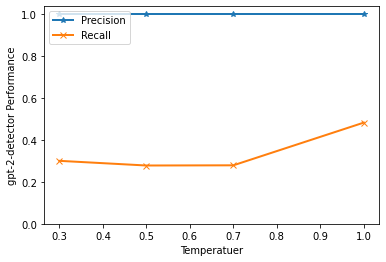

In [82]:
#plt.plot(temp_list, acc_list, label = 'Accuracy', marker = 'o', markersize=8, lw=2)
plt.plot(temp_list, prec_lsit, label = 'Precision', marker = '*',lw=2)
plt.plot(temp_list, rec_list, label = 'Recall', marker = 'x',lw=2)
#plt.plot(temp_list, auc_list, label = 'AUC Score', marker = 'v',lw=2)
plt.xlabel('Temperatuer')
plt.ylabel('gpt-2-detector Performance')
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.legend(loc='upper left')
plt.show()

Accuracy: 0.45
Precision 0.96
Recall 0.34


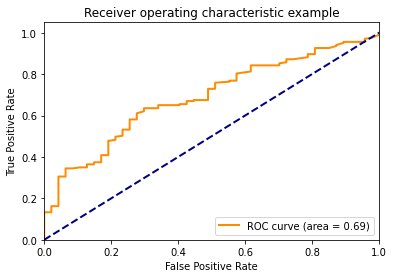

In [76]:
# Overall performance of the gpt-2-detector
fpr = dict()
tpr = dict()
roc_auc = dict()

accuracy = metrics. accuracy_score(data['class'], data['predicted'])
precision = metrics.precision_score(data['class'], data['predicted'])
recall = metrics.recall_score(data['class'], data['predicted'])

print("Accuracy:",  round(accuracy,2))
print("Precision", round(precision,2))
print("Recall", round(recall,2))

fpr, tpr, _ = metrics.roc_curve(data['class'], data['predicted_prob'])
roc_auc = metrics.auc(fpr, tpr)
    
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()